In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
#Importing Data
volve = pd.read_excel('/content/drive/MyDrive/Project Requirements/Datasets/volve production data set.xlsx')

# ***Getting to know our Data***

In [ ]:
volve.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.00000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,19.994172,181.803870,77.162970,154.028791,14.856100,55.168534,45.377815,67.72844,11.441063,1095.638031,161049.063094,1672.152931,5315.479145
std,8.369911,109.712365,45.657949,76.752381,8.406821,36.692924,24.752635,27.71903,19.816930,1323.541545,188136.409296,1706.980951,2181.487231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-458.000000,0.000000
25%,24.000000,0.000000,0.000000,83.665000,10.841250,18.952990,31.148000,56.57775,0.000000,191.000000,29431.000000,20.000000,4338.250000
50%,24.000000,232.897000,103.186500,175.589000,16.308500,52.096880,37.934000,80.07150,2.385000,558.000000,87750.000000,1098.000000,5504.500000
75%,24.000000,255.401250,106.277000,204.320000,21.306500,99.924290,57.101500,88.06200,13.765250,1345.000000,202482.000000,3261.000000,6780.750000
max,25.000000,397.589000,108.502000,345.907000,30.020000,100.000000,137.311000,93.51000,125.719000,5902.000000,851132.000000,8020.000000,10014.000000


In [ ]:
volve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   NPD_WELL_BORE_NAME        15634 non-null  object 
 2   ON_STREAM_HRS             15349 non-null  float64
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 5   AVG_DP_TUBING             8980 non-null   float64
 6   AVG_ANNULUS_PRESS         7890 non-null   float64
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64
 8   AVG_WHP_P                 9155 non-null   float64
 9   AVG_WHT_P                 9146 non-null   float64
 10  DP_CHOKE_SIZE             15340 non-null  float64
 11  BORE_OIL_VOL              9161 non-null   float64
 12  BORE_GAS_VOL              9161 non-null   float64
 13  BORE_WAT_VOL              9161 non-null   float64
 14  BORE_W

In [ ]:
#Filling the na values using pad method
volve.fillna(method="pad", inplace= True)
volve.head(10)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
5,12-Apr-14,15/9-F-1 C,0.0,303.501,96.923,281.447,0.0,3.08702,22.053,8.704,22.053,0.0,0.0,0.0,NaN,production
6,13-Apr-14,15/9-F-1 C,0.0,303.535,96.959,276.032,0.0,1.96237,27.503,9.423,16.163,0.0,0.0,0.0,NaN,production
7,14-Apr-14,15/9-F-1 C,0.0,303.782,96.969,282.787,0.0,0.00000,20.996,8.131,20.737,0.0,0.0,0.0,NaN,production
8,15-Apr-14,15/9-F-1 C,0.0,303.858,97.021,289.941,0.0,31.14186,13.918,8.498,12.182,0.0,0.0,0.0,NaN,production
9,16-Apr-14,15/9-F-1 C,0.0,303.792,97.066,299.672,0.0,0.00000,4.120,8.821,1.490,0.0,0.0,0.0,NaN,production


In [ ]:
#Printing all the different well names
print(volve['NPD_WELL_BORE_NAME'].value_counts())

15/9-F-4       3327
15/9-F-5       3306
15/9-F-14      3056
15/9-F-12      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64


In [ ]:
# convert date string to Panda datetime format
volve['DATEPRD'] =  pd.to_datetime(volve['DATEPRD']) 

print(volve.head())

     DATEPRD NPD_WELL_BORE_NAME  ...  BORE_WI_VOL   FLOW_KIND
0 2014-04-07         15/9-F-1 C  ...          NaN  production
1 2014-04-08         15/9-F-1 C  ...          NaN  production
2 2014-04-09         15/9-F-1 C  ...          NaN  production
3 2014-04-10         15/9-F-1 C  ...          NaN  production
4 2014-04-11         15/9-F-1 C  ...          NaN  production

[5 rows x 16 columns]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41dc42e250>,
      dtype=object)

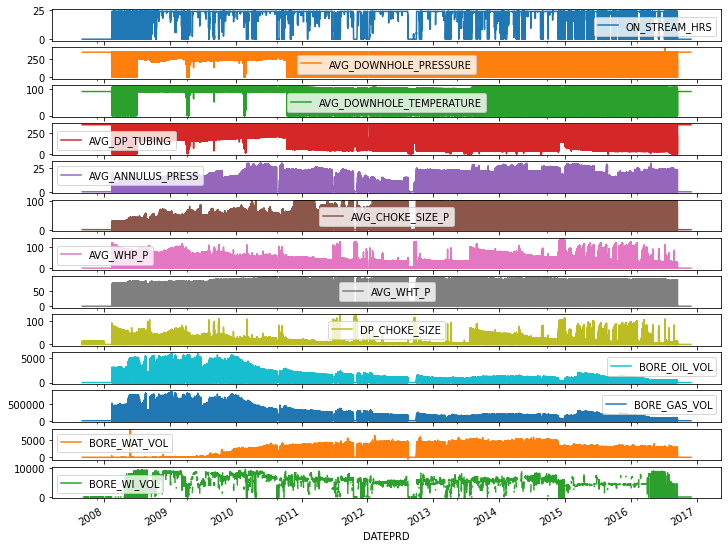

In [ ]:
volve.index = volve['DATEPRD']
volve.drop(columns= ['DATEPRD'],  inplace=True)
volve.plot(figsize = (12,10),subplots = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


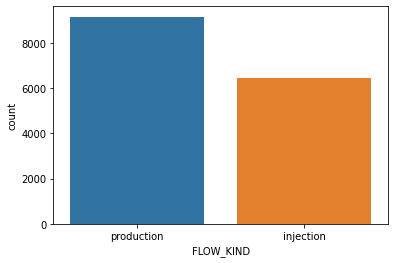

In [ ]:
sns.countplot(volve['FLOW_KIND'])

In [ ]:
sns_plot1=sns.pairplot(volve, vars = ["AVG_DOWNHOLE_PRESSURE",
                                "AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","DP_CHOKE_SIZE",
                                "BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"],diag_kind="hist", hue="NPD_WELL_BORE_NAME")

Output hidden; open in https://colab.research.google.com to view.

# ***Decline Curve Analysis***

In [ ]:
well1 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-12'
df_well1 = volve[well1]
df_well1.head()

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
DATEPRD,,,,,,,,,,,,,,,
2008-02-12,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0,NaN,production
2008-02-13,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0,NaN,production
2008-02-14,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0,NaN,production
2008-02-15,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0,NaN,production
2008-02-16,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0,NaN,production


In [ ]:
##There are null and nan values in the bore oil volume field which may indicate that the production was halted. But we don't need these values rn
#Use this to find out : df_well1[(df_well1.BORE_OIL_VOL==0)] for null
df_well1.dropna(subset=['BORE_OIL_VOL'])
df_well1_x = df_well1[(df_well1.BORE_OIL_VOL!=0)]

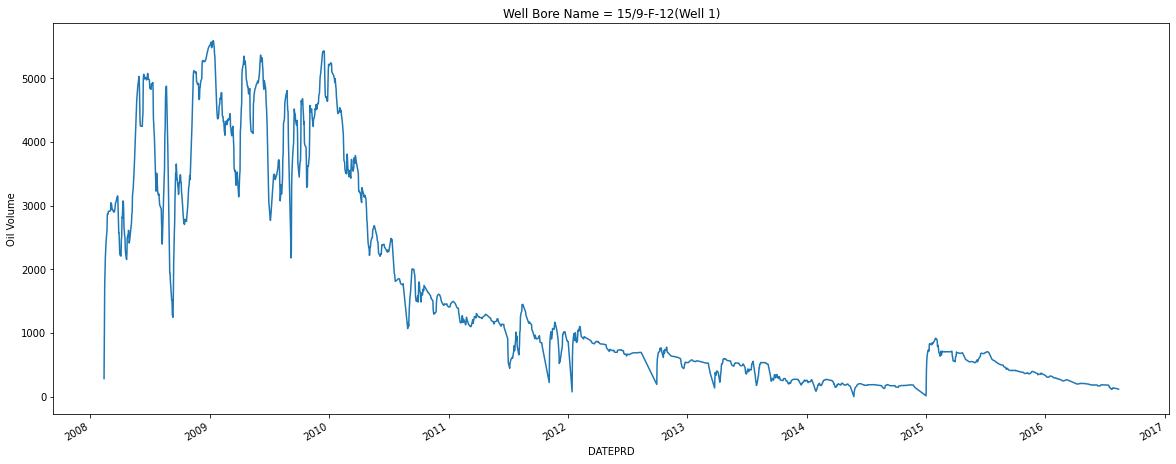

In [ ]:
# plt.plot(df['DATEPRD'],df['BORE_OIL_VOL'])
#Labeling
plt.xlabel('Date')
plt.ylabel('Oil Volume')
plt.title('Well Bore Name = 15/9-F-12(Well 1)')
plt.grid(True)
df_well1_x['BORE_OIL_VOL'].rolling('10D').mean().plot(figsize=(20,8))

Initial production rate (qi)  : 4756.96824 VOL/D
Initial decline rate (di)     : 0.00061 VOL/D
Decline coefficient (b)       : -0.67606
RMSE of regression            : 0.15046


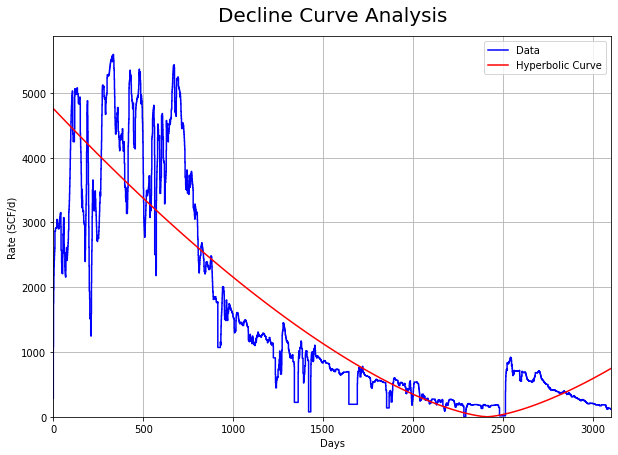

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Project Requirements/Model")
from dca1 import hyperbolic, arps_fit, arps_bootstrap

# Decline curve analysis
qi, di, b, RMSE = arps_fit(df_well1_x.index, df_well1_x['BORE_OIL_VOL'].rolling('10D').mean(), plot=True)

# ***Injection Analysis***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41dba62310>,
      dtype=object)

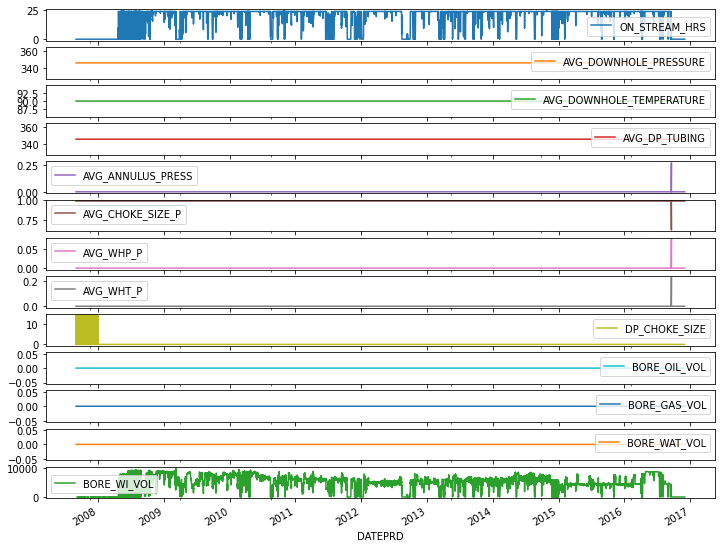

In [ ]:
inj_well = volve[volve['FLOW_KIND'] == 'injection']
inj_well.dropna(how='all', inplace=True)
inj_well.plot(figsize = (12,10),subplots = True)
#This gives us idea that dataset includes some of the null values of water injection wells which indicates their offstream time. Therefore we don't need such values

In [ ]:
inj_well = inj_well[inj_well['ON_STREAM_HRS'] > 0]
inj_well.head()

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
DATEPRD,,,,,,,,,,,,,,,
2008-04-23,15/9-F-4,10.00,345.907,90.034,345.907,0.0,0.9905,0.0,0.0,0.0,0.0,0.0,0.0,166.0,injection
2008-04-24,15/9-F-4,24.00,345.907,90.034,345.907,0.0,0.9905,0.0,0.0,0.0,0.0,0.0,0.0,3565.0,injection
2008-04-25,15/9-F-4,24.00,345.907,90.034,345.907,0.0,0.9905,0.0,0.0,0.0,0.0,0.0,0.0,6917.0,injection
2008-04-26,15/9-F-4,18.65,345.907,90.034,345.907,0.0,0.9905,0.0,0.0,0.0,0.0,0.0,0.0,6618.0,injection
2008-04-27,15/9-F-4,15.96,345.907,90.034,345.907,0.0,0.9905,0.0,0.0,0.0,0.0,0.0,0.0,4507.0,injection


In [ ]:
#Wells used for injection purposes
print(inj_well['NPD_WELL_BORE_NAME'].value_counts())
print('Mean time =', inj_well['ON_STREAM_HRS'].mean(), 'hrs/day')

15/9-F-4    2830
15/9-F-5    2547
Name: NPD_WELL_BORE_NAME, dtype: int64
Mean time = 22.712341454342557 hrs/day


In [ ]:
inj_well_F4 = inj_well[inj_well['NPD_WELL_BORE_NAME'] == '15/9-F-4']
inj_well_F5 = inj_well[inj_well['NPD_WELL_BORE_NAME'] == '15/9-F-5']
total_inj = inj_well_F4['BORE_WI_VOL']+inj_well_F5['BORE_WI_VOL']

# ***Forecast using linear regression***

In [ ]:
#Doing this analysis for well 15/9-F-14
#There is no injection well present in the above mentioned well
df_well2 = volve[volve['NPD_WELL_BORE_NAME'] == '15/9-F-14']
df_well2 = df_well2[df_well2['BORE_GAS_VOL'] > 0]
df_well2.drop(columns=['NPD_WELL_BORE_NAME', 'BORE_WI_VOL', 'FLOW_KIND'], inplace=True)
df_well2.dropna(inplace = True)

In [ ]:
df_well2.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,,
2008-07-13,24.00,260.867,103.293,160.152,0.0,21.05299,100.715,52.382,69.539,1735.0,252235.0,4.0
2008-07-14,5.57,256.248,104.018,156.650,0.0,27.22346,99.598,71.115,68.016,592.0,88949.0,1.0
2008-07-15,24.00,254.983,103.967,156.333,0.0,27.27795,98.650,67.591,66.949,2532.0,373786.0,6.0
2008-07-16,24.00,251.476,104.211,155.817,0.0,30.65055,95.659,73.782,63.664,3031.0,447840.0,9.0
2008-07-17,24.00,249.346,104.339,155.761,0.0,32.56254,93.585,78.035,61.338,3288.0,474614.0,8.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_well2[:] = scaler.fit_transform(df_well2[:])

In [ ]:
df_well2.tail()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,,
2016-07-09,0.9068,0.922298,0.939329,0.936748,0.886215,0.820602,0.258126,0.931234,0.032662,0.018072,0.021046,0.414710
2016-07-10,0.9600,0.912382,0.939732,0.933989,0.898733,1.000000,0.238957,0.946946,0.006231,0.020021,0.023670,0.564076
2016-07-11,0.9468,0.918716,0.939573,0.934962,0.897047,0.910976,0.252900,0.945984,0.024003,0.019313,0.022690,0.541645
2016-07-12,0.9600,0.912654,0.939807,0.933488,0.901694,1.000000,0.240737,0.951209,0.005973,0.020198,0.023405,0.557816
2016-07-13,0.5956,0.913981,0.939929,0.933419,0.901806,0.603011,0.244235,0.949394,0.013320,0.012048,0.013338,0.341854


In [ ]:
df_well2_x = df_well2.drop(columns=['BORE_OIL_VOL'])
df_well2_y = df_well2['BORE_OIL_VOL']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_well2_x, df_well2_y, test_size=0.10)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred_test = linreg.predict(X_test)
ypred_train = linreg.predict(X_train)

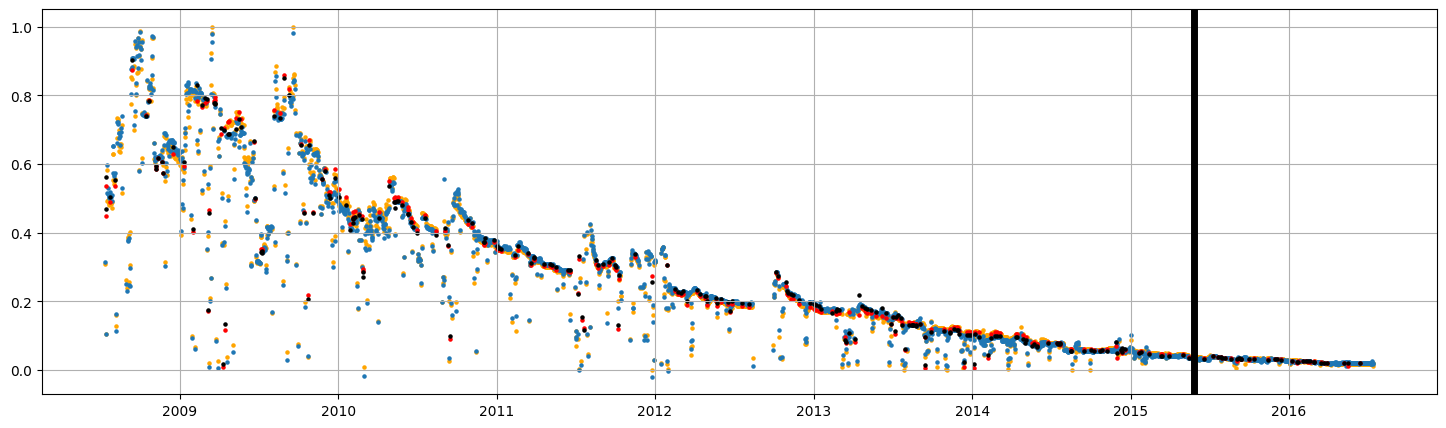

In [ ]:
plt.style.use('default')
plt.figure(figsize=(18,5))

plt.scatter(X_train.index, y_train,color='orange',s=5)
plt.scatter(X_train.index, ypred_train, s=5 )

plt.scatter(X_test.index , y_test ,color='red',s=5)
plt.scatter(X_test.index , ypred_test , color='black', s=5)

plt.axvline(X_test.index[0], color='black',lw=5)

plt.grid()

# ***Random Forest Regression***

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [ ]:
list_well = list(volve["NPD_WELL_BORE_NAME"].unique())

In [ ]:
target = volve['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1, 1)
target.shape

(15634, 1)

In [ ]:
data = volve.drop(["AVG_DOWNHOLE_PRESSURE"], axis=1)
data.shape

(15634, 14)

(746, 6)
(746, 1)


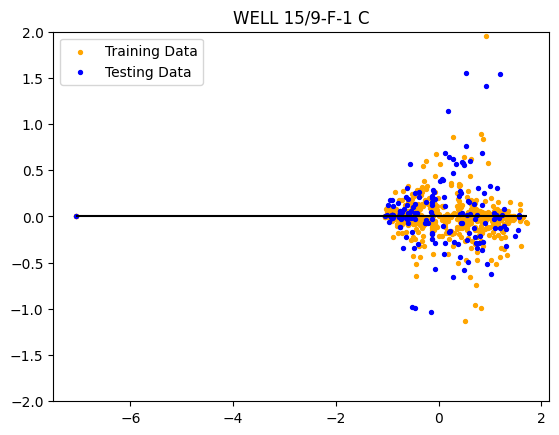

(1165, 6)
(1165, 1)


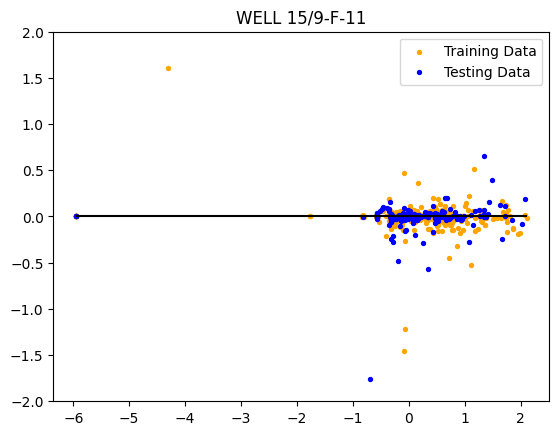

(3056, 6)
(3056, 1)


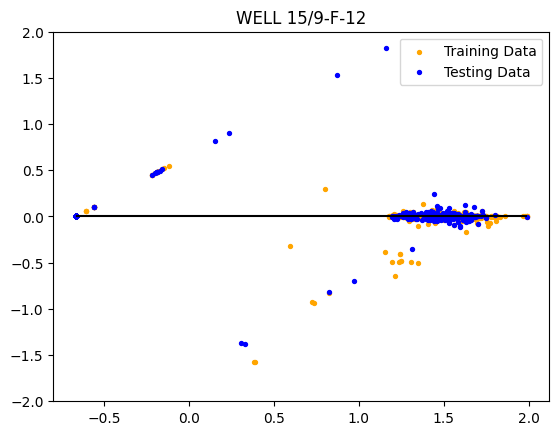

(3056, 6)
(3056, 1)


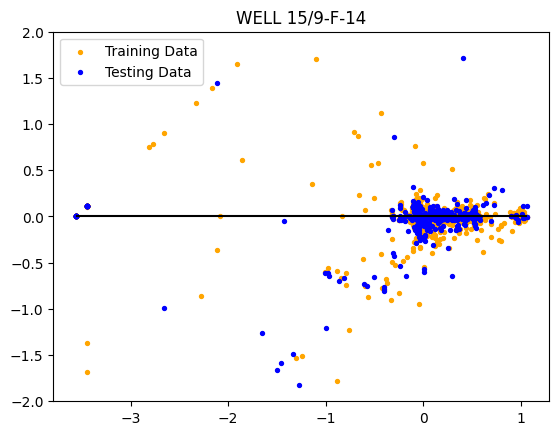

(978, 6)
(978, 1)


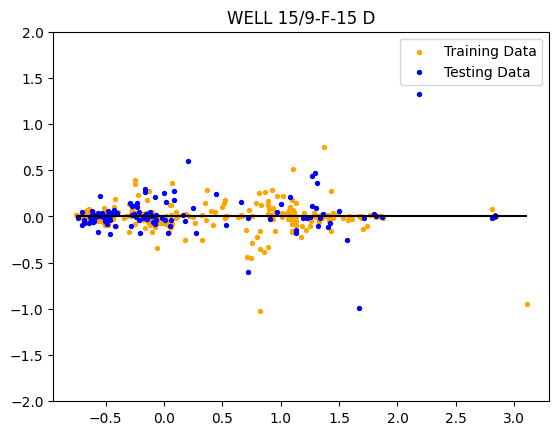

(3327, 6)
(3327, 1)


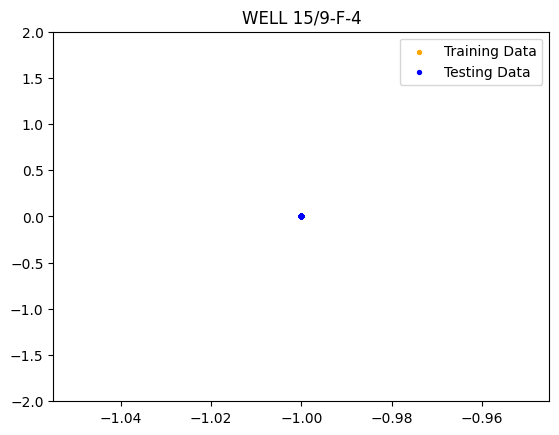

(3306, 6)
(3306, 1)


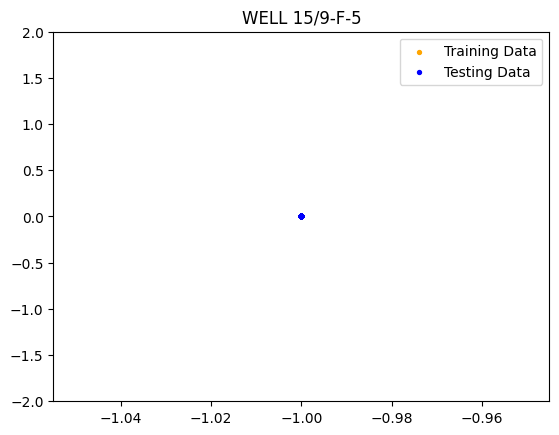

In [ ]:
# Looping through all 5 wells

for i in list_well:
    
#   Independednt Variables
    X =(volve.loc[volve["NPD_WELL_BORE_NAME"]== i])[["AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"]]
    print(X.shape)
    
#   Target Variable
    y=(volve.loc[volve["NPD_WELL_BORE_NAME"]== i])["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
    print(y.shape)

#  Split to train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
#   Scale X and y
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
    
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    
    rf = RandomForestRegressor(n_estimators=5,max_depth=10)
    rf = rf.fit(X_train_scaled, y_train_scaled.ravel())
    
    #   Plot the Residuals for the Training and Testing data
    predictions_train = rf.predict(X_train_scaled)
    predictions_test = rf.predict(X_test_scaled)
    
    plt.scatter(predictions_train, predictions_train - y_train_scaled.ravel(), c= "orange",label="Training Data", s=8)
    plt.scatter(predictions_test, predictions_test - y_test_scaled.ravel(), c= "blue",label="Testing Data",s=8)
    plt.ylim(-2,2)
    plt.hlines(y=0, xmin=predictions_train.min(), xmax=predictions_train.max())
    plt.title(f'WELL {i}')
    plt.legend()
    plt.show()